# modulos y rutas

In [1]:
import os
import pandas as pd


In [2]:
#Ruta = r"C:\Users\crist\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\NS\NS validado\all-NS-VAL.txt"
Ruta = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\NS\NS validado\all-NS-VAL.txt"
df_txt = pd.read_csv(Ruta, sep=',', encoding='ansi', dtype=str)
print(df_txt.columns)

Index(['Nombre_Archivo', 'NUM_SOLICITUD_NOVEDAD', 'ENT_ID', 'TPS_IDN_ID',
       'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO',
       'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE',
       'AFL_FECHA_NACIMIENTO', 'MNC_ID', 'NOVEDAD', 'FECHA_NOVEDAD',
       'COD_1_NOVEDAD', 'COD_2_NOVEDAD', 'COD_3_NOVEDAD', 'COD_4_NOVEDAD',
       'COD_5_NOVEDAD', 'COD_6_NOVEDAD', 'COD_7_NOVEDAD', 'Fecha_Proceso'],
      dtype='object')


In [3]:
# Convertir la columna 'Fecha_Proceso' a tipo datetime
df_txt['Fecha_Proceso'] = pd.to_datetime(df_txt['Fecha_Proceso'], format='%d/%m/%Y', errors='coerce')

# Filtrar registros del año 2025
df_2025 = df_txt[df_txt['Fecha_Proceso'].dt.year == 2025]

# Crear columna de mes
df_2025['Mes'] = df_2025['Fecha_Proceso'].dt.month

# Agrupar por 'NOVEDAD' y 'Mes', contar registros
tabla = df_2025.groupby(['NOVEDAD', 'Mes']).size().unstack(fill_value=0).reindex(columns=range(1,13), fill_value=0)

# Renombrar columnas de los meses
tabla.columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

tabla

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_20888\729327430.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025['Mes'] = df_2025['Fecha_Proceso'].dt.month


,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
NOVEDAD,,,,,,,,,,,,
N01,40,61,56,155,48,37,84,32,40,36,27,0
N02,55,23,28,27,31,26,31,22,41,13,8,0
N03,35,17,25,23,29,20,26,20,27,19,8,0
N04,124,161,110,93,171,147,142,96,137,144,100,0
N09,37,45,43,19,25,47,44,24,35,30,21,0
N12,0,0,0,3,7,301,0,0,0,0,0,0
N14,68,255,202,70,100,141,58,111,204,110,98,0
N17,14,0,0,0,0,7,0,0,3,0,0,0
N19,25,51,28,47,76,42,53,48,2288,4782,21770,0


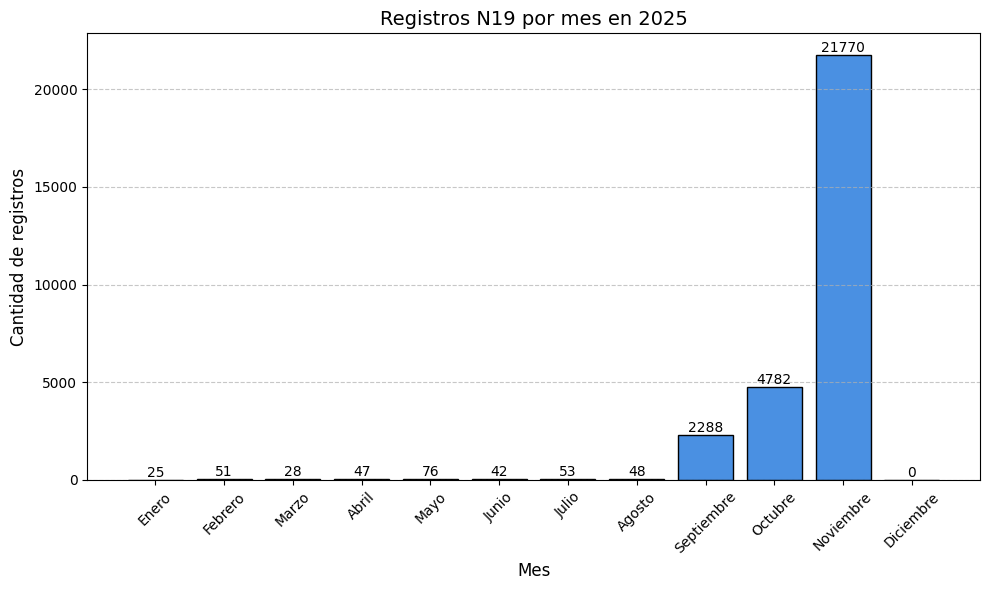

In [7]:
import matplotlib.pyplot as plt
Novedad = "N19"

# Seleccionar solo el registro
n04_data = tabla.loc[Novedad]

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(n04_data.index, n04_data.values, color='#4a90e2', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de registros', fontsize=12)
plt.title(f'Registros {Novedad} por mes en 2025', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir los valores encima de cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()